In [2]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np
import re
# Read the image

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

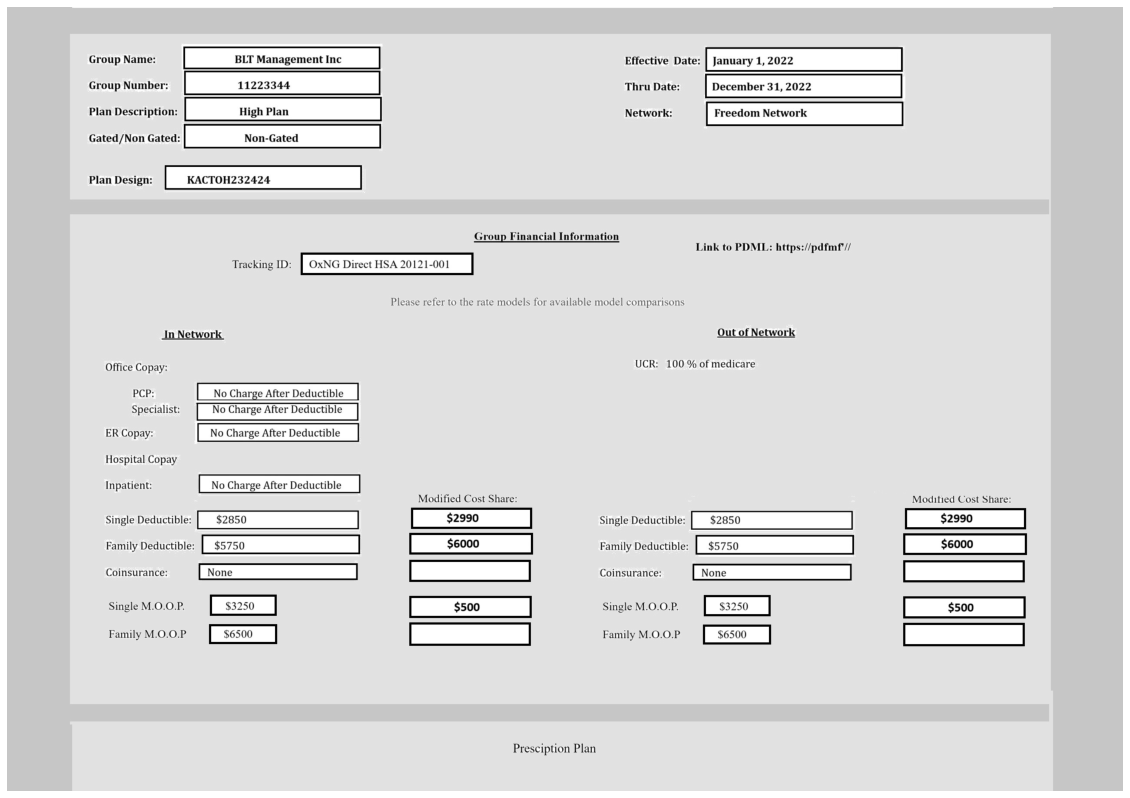

In [66]:
# Read the image using OpenCV
image = cv2.imread(r"C:\Users\Subhadeep\Downloads\subha.jpeg")

height, width, _ = image.shape
crop_height = int(height * 0.5)

# Crop the top 40% of the image
cropped_image = image[:crop_height, :]

# Convert the image to grayscale
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image using matplotlib

plt.figure(figsize=(20,20))
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()



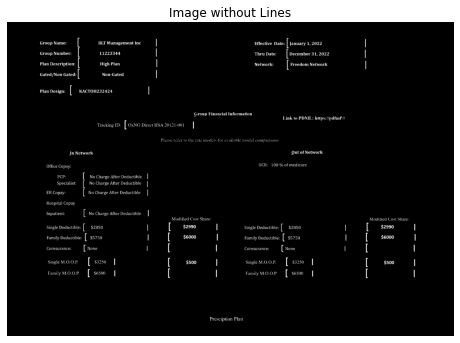

In [67]:
class LineRemover:
    def __init__(self, image_with_padding_path):
        self.image_with_padding = cropped_image
        self.grey = None
        self.thresholded_image = None
        self.inverted_image = None

    def grayscale_image(self):
        self.grey = cv2.cvtColor(self.image_with_padding, cv2.COLOR_BGR2GRAY)

    def threshold_image(self):
        self.thresholded_image = cv2.threshold(self.grey, 127, 255, cv2.THRESH_BINARY)[1]

    def invert_image(self):
        self.inverted_image = cv2.bitwise_not(self.thresholded_image)

    def display_image(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.inverted_image, cv2.COLOR_BGR2RGB))
        plt.title('Inverted Binary Image')
        plt.axis('off')
        plt.show()
        
    def erode_vertical_lines(self):
        hor = np.array([[1,1,1,1,1,1]])
        self.vertical_lines_eroded_image = cv2.erode(self.inverted_image, hor, iterations=10)
        self.vertical_lines_eroded_image = cv2.dilate(self.vertical_lines_eroded_image, hor, iterations=10)

    def display_image_with_eroded_vertical_lines(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.vertical_lines_eroded_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with Vertical Lines Eroded')
        plt.axis('off')
        plt.show()
        
    def erode_horizontal_lines(self):
        ver = np.array([[1], [1], [1], [1], [1], [1], [1]])
        self.horizontal_lines_eroded_image = cv2.erode(self.inverted_image, ver, iterations=10)
        self.horizontal_lines_eroded_image = cv2.dilate(self.horizontal_lines_eroded_image, ver, iterations=10)
        
    def display_image_with_eroded_horizontal_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.horizontal_lines_eroded_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with horizontal Lines Eroded')
        plt.axis('off')
        plt.show()
        
    def combine_eroded_images(self):
        self.combined_image = cv2.add(self.vertical_lines_eroded_image, self.horizontal_lines_eroded_image)

    def display_image_with_combined_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.combined_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with combined eroded lines')
        plt.axis('off')
        plt.show()
    def dilate_combined_image_to_make_lines_thicker(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.combined_image_dilated = cv2.dilate(self.combined_image, kernel, iterations=2)

    def display_thickened_lines(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.combined_image_dilated, cv2.COLOR_BGR2RGB))
        plt.title('Image with Thickened Lines')
        plt.axis('off')
        plt.show()
        
    def subtract_combined_and_dilated_image_from_original_image(self):
        self.image_without_lines = cv2.subtract(self.inverted_image, self.combined_image_dilated)
        
    def display_image_without_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.image_without_lines, cv2.COLOR_BGR2RGB))
        plt.title('Image without Lines')
        plt.axis('off')
        plt.show()
    def remove_noise_with_erode_and_dilate(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.image_without_lines_noise_removed = cv2.erode(self.image_without_lines, kernel, iterations=1)
        self.image_without_lines_noise_removed = cv2.dilate(self.image_without_lines_noise_removed, kernel, iterations=1)
        
    def display_image_without_noise(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.image_without_lines_noise_removed, cv2.COLOR_BGR2RGB))
        plt.title('Image without noise')
        plt.axis('off')
        plt.show()

#img1 = cv2.imread('part1.jpg')
# Instantiate the class
line_remover = LineRemover(cropped_image)

# Call the preprocessing methods
line_remover.grayscale_image()
line_remover.threshold_image()
line_remover.invert_image()
line_remover.erode_vertical_lines()
line_remover.erode_horizontal_lines()
line_remover.combine_eroded_images()
line_remover.dilate_combined_image_to_make_lines_thicker()
line_remover.subtract_combined_and_dilated_image_from_original_image()

# Display the image without lines
line_remover.display_image_without_lines(line_remover.image_without_lines)

In [75]:
text = pytesseract.image_to_string(line_remover.image_without_lines)
text

'Group Name:\n\nBLT Management Inc\n\n—aSo-——r—\n\nGroup Number: 11223344\nPlan Description: High Plan\nGated/Non Gated: Non-Gated\n\nPlan Design: [ KACTOH232424 |\n\nEffective Date: [ january 1, 2022\nThru Date: [ December 31,2022\n\nNetwork: [ Freedom Network\n\nGroup Financial Information\n\nTracking ID: [ OxNG Direct HSA 20121-001\n\nIn Network\n\nOffice Copay:\n\nPCP: [ No Charge After Deductible |\nSpecialist: l No Charge After Deductible |\n\nER Copay: [ No Charge After Deductible |\nHospital Copay\n\nInpatient: [ No Charge After Deductible |\n\nSingle Deductible: [ $2850 |\n\nFamily Deductible: [ $5750 |\n\nCoinsurance: [ None |\nSingle M.0.O.P. [ $3250 |\nFamily M.O.0.P [ $6500 |\n\nLink to PDMIL.: https://pdfmf"//\n\nPlease refer to the rate models for available model comparisons\n\nSe Oe\n\n$2990\n\n$6000\n\n$500\n\nModified Cost Share:\n\nPresciption Plan\n\nOut of Network\n\nUCR: 100% of medicare\n\nSingle Deductible: [ $2850 |\n\nFamily Deductible: [ $5750 |\n\nCoinsuranc

In [119]:
import re

def clean_text(text):
    # Remove unwanted characters and extra spaces
    pattern = r'(?<=\.)0(?=\.)'

    # Replace zeroes with 'O' using re.sub()
    text = re.sub(pattern, 'O', text)
    cleaned_text = re.sub(r'[|\[\]]', '', text)
    
    # Normalize whitespace
    #cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    
    # Fix OCR errors and formatting issues
    #cleaned_text = cleaned_text.replace('l', 'l')  # Replace 'l' with '1'
    cleaned_text = cleaned_text.replace('| |', '')  # Remove extra '|'
    #cleaned_text = cleaned_text.replace('OxNG', 'OING')  # Fix OCR error
    
    return cleaned_text.strip()  # Strip leading and trailing whitespace

# Original text

# Cleaned text
cleaned_text = clean_text(text)
print(cleaned_text)


Group Name:

BLT Management Inc

—aSo-——r—

Group Number: 11223344
Plan Description: High Plan
Gated/Non Gated: Non-Gated

Plan Design:  KACTOH232424 

Effective Date:  january 1, 2022
Thru Date:  December 31,2022

Network:  Freedom Network

Group Financial Information

Tracking ID:  OxNG Direct HSA 20121-001

In Network

Office Copay:

PCP:  No Charge After Deductible 
Specialist: l No Charge After Deductible 

ER Copay:  No Charge After Deductible 
Hospital Copay

Inpatient:  No Charge After Deductible 

Single Deductible:  $2850 

Family Deductible:  $5750 

Coinsurance:  None 
Single M.O.O.P.  $3250 
Family M.O.O.P  $6500 

Link to PDMIL.: https://pdfmf"//

Please refer to the rate models for available model comparisons

Se Oe

$2990

$6000

$500

Modified Cost Share:

Presciption Plan

Out of Network

UCR: 100% of medicare

Single Deductible:  $2850 

Family Deductible:  $5750 

Coinsurance:  None 
Single M.O.O.P.  $3250 
Family M.O.O.P  $6500 

Se Oe

Modified Cost Share:

$2990


In [79]:
''''import re

# Provided text
text = "PCP 200\nER Copay 100\nSingle Deductible: 2850 2990"

# Define a regex pattern to find 'Single Deductible' and its value(s)
pattern = r'Single Deductible:.*?(\d+)(?:\s+(\d+))?$'

# Search for the pattern in the text
match = re.search(pattern, text)

# If 'Single Deductible' and its value(s) are found
if match:
    # If there are two values, grab the last one
    if match.group(2):
        single_deductible = match.group(2)
    # If there is only one value, grab it
    else:
        single_deductible = match.group(1)
    print("Single Deductible value:", single_deductible)
else:
    print("Single Deductible not found in the text.")'''


'\'import re\n\n# Provided text\ntext = "PCP 200\nER Copay 100\nSingle Deductible: 2850 2990"\n\n# Define a regex pattern to find \'Single Deductible\' and its value(s)\npattern = r\'Single Deductible:.*?(\\d+)(?:\\s+(\\d+))?$\'\n\n# Search for the pattern in the text\nmatch = re.search(pattern, text)\n\n# If \'Single Deductible\' and its value(s) are found\nif match:\n    # If there are two values, grab the last one\n    if match.group(2):\n        single_deductible = match.group(2)\n    # If there is only one value, grab it\n    else:\n        single_deductible = match.group(1)\n    print("Single Deductible value:", single_deductible)\nelse:\n    print("Single Deductible not found in the text.")'

In [120]:
cleaned_text

'Group Name:\n\nBLT Management Inc\n\n—aSo-——r—\n\nGroup Number: 11223344\nPlan Description: High Plan\nGated/Non Gated: Non-Gated\n\nPlan Design:  KACTOH232424 \n\nEffective Date:  january 1, 2022\nThru Date:  December 31,2022\n\nNetwork:  Freedom Network\n\nGroup Financial Information\n\nTracking ID:  OxNG Direct HSA 20121-001\n\nIn Network\n\nOffice Copay:\n\nPCP:  No Charge After Deductible \nSpecialist: l No Charge After Deductible \n\nER Copay:  No Charge After Deductible \nHospital Copay\n\nInpatient:  No Charge After Deductible \n\nSingle Deductible:  $2850 \n\nFamily Deductible:  $5750 \n\nCoinsurance:  None \nSingle M.O.O.P.  $3250 \nFamily M.O.O.P  $6500 \n\nLink to PDMIL.: https://pdfmf"//\n\nPlease refer to the rate models for available model comparisons\n\nSe Oe\n\n$2990\n\n$6000\n\n$500\n\nModified Cost Share:\n\nPresciption Plan\n\nOut of Network\n\nUCR: 100% of medicare\n\nSingle Deductible:  $2850 \n\nFamily Deductible:  $5750 \n\nCoinsurance:  None \nSingle M.O.O.P. 

In [121]:
import re

# Initialize an empty dictionary to store key-value pairs
extracted_values = {}

# Define regular expressions for extracting values associated with keys
regex_patterns = {
    'Group Name': r'Group Name:\s*([^\n]*)',
    'Group Number': r'Group Number:\s*([^\n]*)',
    'Network': r'Network:\s*([^\n]*)',
    'Effective Date': r'Effective Date:\s*([^\n]*)',
    'Thru Date': r'Thru Date:\s*([^\n]*)'
}

# Iterate over the regex patterns and extract values
for key, pattern in regex_patterns.items():
    match = re.search(pattern, cleaned_text, re.DOTALL)
    if match:
        extracted_values[key] = match.group(1).strip()

# Display the extracted values
print("Extracted values:")
for key, value in extracted_values.items():
    print(f"{key}: {value}")


Extracted values:
Group Name: BLT Management Inc
Group Number: 11223344
Network: Freedom Network
Effective Date: january 1, 2022
Thru Date: December 31,2022


In [122]:
start_phrase = 'In Network'
end_phrase = 'Out of Network'

start_index = cleaned_text.find(start_phrase)
end_index = cleaned_text.find(end_phrase, start_index)

IN_text = cleaned_text[start_index:end_index]
IN_text

'In Network\n\nOffice Copay:\n\nPCP:  No Charge After Deductible \nSpecialist: l No Charge After Deductible \n\nER Copay:  No Charge After Deductible \nHospital Copay\n\nInpatient:  No Charge After Deductible \n\nSingle Deductible:  $2850 \n\nFamily Deductible:  $5750 \n\nCoinsurance:  None \nSingle M.O.O.P.  $3250 \nFamily M.O.O.P  $6500 \n\nLink to PDMIL.: https://pdfmf"//\n\nPlease refer to the rate models for available model comparisons\n\nSe Oe\n\n$2990\n\n$6000\n\n$500\n\nModified Cost Share:\n\nPresciption Plan\n\n'

In [124]:

IN_values = {}

regex_patterns = {
    'PCP': r'PCP:([^\n]*)',
    'Specialist': r'Specialist:([^\n]*)',
    'ER Copay': r'ER Copay:([^\n]*)',
    'Single Deductible': r'Single Deductible:([^\n]*)',
    'Family Deductible': r'Family Deductible:([^\n]*)',
    'Coinsurance': r'Coinsurance:([^\n]*)',
    'Single M.O.O.P.': r"Single\sM\.O\.O\.P\.\s+([^\n]*)",
    'Family M.O.O.P.': r"Family\sM\.O\.O\.P\s+([^\n]*)"
}

# Iterate over the regex patterns and extract values
for key, pattern in regex_patterns.items():
    match = re.search(pattern, IN_text, re.DOTALL)
    if match:
        IN_values['IN '+key] = match.group(1).strip()

# Display the extracted values
print("In Network values:\n")
for key, value in IN_values.items():
    print(f"{key}: {value}")

    

    

In Network values:

IN PCP: No Charge After Deductible
IN Specialist: l No Charge After Deductible
IN ER Copay: No Charge After Deductible
IN Single Deductible: $2850
IN Family Deductible: $5750
IN Coinsurance: None
IN Single M.O.O.P.: $3250
IN Family M.O.O.P.: $6500


In [126]:
start_phrase = 'Out of Network'

start_index = cleaned_text.find(start_phrase)

OON_text = cleaned_text[start_index:]
OON_text

'Out of Network\n\nUCR: 100% of medicare\n\nSingle Deductible:  $2850 \n\nFamily Deductible:  $5750 \n\nCoinsurance:  None \nSingle M.O.O.P.  $3250 \nFamily M.O.O.P  $6500 \n\nSe Oe\n\nModified Cost Share:\n\n$2990\n\n$6000\n\n$500'

In [127]:

OON_values = {}

regex_patterns = {
    'Single Deductible': r'Single Deductible:([^\n]*)',
    'Family Deductible': r'Family Deductible:([^\n]*)',
    'Coinsurance': r'Coinsurance:([^\n]*)',
    'Single M.O.O.P.': r"Single\sM\.O\.O\.P\.\s+([^\n]*)",
    'Family M.O.O.P.': r"Family\sM\.O\.O\.P\s+([^\n]*)"
}

# Iterate over the regex patterns and extract values
for key, pattern in regex_patterns.items():
    match = re.search(pattern, OON_text)
    if match:
        OON_values['OON ' + key] = match.group(1).strip()

# Display the extracted values
print("Out of Network values:\n")
for key, value in OON_values.items():
    print(f"{key}: {value}")


    

    

Out of Network values:

OON Single Deductible: $2850
OON Family Deductible: $5750
OON Coinsurance: None
OON Single M.O.O.P.: $3250
OON Family M.O.O.P.: $6500


In [129]:
final_dict = {}
final_dict.update(extracted_values)
final_dict.update(IN_values)
final_dict.update(OON_values)
final_dict

{'Group Name': 'BLT Management Inc',
 'Group Number': '11223344',
 'Network': 'Freedom Network',
 'Effective Date': 'january 1, 2022',
 'Thru Date': 'December 31,2022',
 'IN PCP': 'No Charge After Deductible',
 'IN Specialist': 'l No Charge After Deductible',
 'IN ER Copay': 'No Charge After Deductible',
 'IN Single Deductible': '$2850',
 'IN Family Deductible': '$5750',
 'IN Coinsurance': 'None',
 'IN Single M.O.O.P.': '$3250',
 'IN Family M.O.O.P.': '$6500',
 'OON Single Deductible': '$2850',
 'OON Family Deductible': '$5750',
 'OON Coinsurance': 'None',
 'OON Single M.O.O.P.': '$3250',
 'OON Family M.O.O.P.': '$6500'}

In [134]:
import pandas as pd
df=pd.DataFrame(final_dict,index=[0])
df

,Group Name,Group Number,Network,Effective Date,Thru Date,IN PCP,IN Specialist,IN ER Copay,IN Single Deductible,IN Family Deductible,IN Coinsurance,IN Single M.O.O.P.,IN Family M.O.O.P.,OON Single Deductible,OON Family Deductible,OON Coinsurance,OON Single M.O.O.P.,OON Family M.O.O.P.
0,BLT Management Inc,11223344,Freedom Network,"january 1, 2022","December 31,2022",No Charge After Deductible,l No Charge After Deductible,No Charge After Deductible,$2850,$5750,None,$3250,$6500,$2850,$5750,None,$3250,$6500
